# Assignment 03

In [1]:
using Plots
using GraphRecipes
using LinearAlgebra
using DelimitedFiles
using LightGraphs

In [2]:
function find_shortest_path(A)
    shortest_path = Dict()
    lenght = 1
    got_all_paths = false

    while !got_all_paths
        admissible_walks = map(Tuple, findall(x -> x >= 1, A ^ lenght))
        any_true = false
        for walk in admissible_walks
            if walk ∉ keys(shortest_path)
                shortest_path[walk] = lenght
                any_true = true
            end
        end
        lenght += 1
        got_all_paths = !any_true
    end
    
    return shortest_path
end

function geodesic_matrix(A)
    N, N = size(A)
    geodesics = find_shortest_path(A)
    shortest_path_matrix = zeros(N, N)
    for r in 1:N
        for c in 1:N
            shortest_path_matrix[r, c] = geodesics[r, c]
        end
    end
    
    # The elements in the diagonal take value 0
    shortest_path_matrix[diagind(shortest_path_matrix)] .= 0
    return shortest_path_matrix
end

geodesic_matrix (generic function with 1 method)

**Definition: Closeness centrality**  
In a connected graph, the closeness centrality of node $i$ is defined as the reciprocal of the sum of distances from $i$ to the other nodes:

$$
    c_i^C = \frac{1}{\sum_{j=1}^N d_{ij}}
$$

The normalised quantity, defined as

$$
    C_i^C = (N-1) c_i^C
$$

takes values in the range $[0, 1]$.

### Normalised closeness centrality for the directed graph

In [3]:
# Adjacency matrix of an directed graph
A_dir = [
    0 1 0 0 1;
    0 0 1 0 0;
    0 0 0 1 1;
    0 1 0 0 0;
    1 0 0 0 0;
]

N, N = size(A_dir)
D_dir = geodesic_matrix(A_dir)

5×5 Array{Float64,2}:
 0.0  1.0  2.0  3.0  1.0
 3.0  0.0  1.0  2.0  2.0
 2.0  2.0  0.0  1.0  1.0
 4.0  1.0  2.0  0.0  3.0
 1.0  2.0  3.0  4.0  0.0

In [4]:
4 / (2 + 2 + 0 + 1 + 1)

0.6666666666666666

In [5]:
# Closeness centrality
c_dir = 1 ./ sum(D_dir, dims=2)
# Normalized closeness centrality
C_dir = (N - 1) * c_dir

5×1 Array{Float64,2}:
 0.5714285714285714
 0.5
 0.6666666666666666
 0.4
 0.4

### Normalised closeness centrality for the corresponging undirected graph

In [6]:
# Adjacency matrix of the corresponding undirected graph
A_un = [
    0 1 0 0 1;
    1 0 1 1 0;
    0 1 0 1 1;
    0 1 1 0 0;
    1 0 1 0 0;
]

D_un = geodesic_matrix(A_un)

5×5 Array{Float64,2}:
 0.0  1.0  2.0  2.0  1.0
 1.0  0.0  1.0  1.0  2.0
 2.0  1.0  0.0  1.0  1.0
 2.0  1.0  1.0  0.0  2.0
 1.0  2.0  1.0  2.0  0.0

In [7]:
c_un = 1 ./ sum(D_un, dims=2)
C_un = (N - 1) * c_un

5×1 Array{Float64,2}:
 0.6666666666666666
 0.8
 0.8
 0.6666666666666666
 0.6666666666666666

## Question 2: A tree

In [8]:
edges = [
    1 2
    1 3
    2 4
    2 5
    4 8
    4 9
    5 10
    5 11
    3 6
    3 7
    6 12
    6 13
    7 14
    7 15
]

N = maximum(edges)
A = zeros(N, N)
for (i, j) in eachrow(edges)
    A[i, j] = 1
    A[j, i] = 1
end

N = maximum(edges)
A

15×15 Array{Float64,2}:
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 

In [9]:
sum(A, dims=2)

15×1 Array{Float64,2}:
 2.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [10]:
# Average node degree of the graph
(2 * 1 + 3 * 6 + 1 * 8) / 15

1.8666666666666667

In [11]:
# degree, count
node_degrees = sum(A, dims=2)
vcat([[i count(x -> x == i, node_degrees)] for i=1:4])

4-element Array{Array{Int64,2},1}:
 [1 8]
 [2 1]
 [3 6]
 [4 0]

In [12]:
sum([count(x -> x == i, node_degrees) for i=1:4])

15

In [13]:
Dtree = geodesic_matrix(A)

15×15 Array{Float64,2}:
 0.0  1.0  1.0  2.0  2.0  2.0  2.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  0.0  2.0  1.0  1.0  3.0  3.0  2.0  2.0  2.0  2.0  4.0  4.0  4.0  4.0
 1.0  2.0  0.0  3.0  3.0  1.0  1.0  4.0  4.0  4.0  4.0  2.0  2.0  2.0  2.0
 2.0  1.0  3.0  0.0  2.0  4.0  4.0  1.0  1.0  3.0  3.0  5.0  5.0  5.0  5.0
 2.0  1.0  3.0  2.0  0.0  4.0  4.0  3.0  3.0  1.0  1.0  5.0  5.0  5.0  5.0
 2.0  3.0  1.0  4.0  4.0  0.0  2.0  5.0  5.0  5.0  5.0  1.0  1.0  3.0  3.0
 2.0  3.0  1.0  4.0  4.0  2.0  0.0  5.0  5.0  5.0  5.0  3.0  3.0  1.0  1.0
 3.0  2.0  4.0  1.0  3.0  5.0  5.0  0.0  2.0  4.0  4.0  6.0  6.0  6.0  6.0
 3.0  2.0  4.0  1.0  3.0  5.0  5.0  2.0  0.0  4.0  4.0  6.0  6.0  6.0  6.0
 3.0  2.0  4.0  3.0  1.0  5.0  5.0  4.0  4.0  0.0  2.0  6.0  6.0  6.0  6.0
 3.0  2.0  4.0  3.0  1.0  5.0  5.0  4.0  4.0  2.0  0.0  6.0  6.0  6.0  6.0
 3.0  4.0  2.0  5.0  5.0  1.0  3.0  6.0  6.0  6.0  6.0  0.0  2.0  4.0  4.0
 3.0  4.0  2.0  5.0  5.0  1.0  3.0  6.0  6.0  6.0  6.0  2.0  0.0  4.0  4.0
 

In [14]:
maximum(Dtree)

6.0

## Question 3: $\alpha$-centrality

**Definition: $\alpha$-centrality**  
In an undirectec graph, the $\alpha$ centrality $c_i^\alpha$ of node $i$ is defined as the $i$-th component of the vector:

$$
    {\bf c}^\alpha = \left({\bf I} - \alpha A^T\right)^{-1} {\bf e}
$$

Where ${\bf e}$ is a vector of $N$ ones

The $k$-th entry of the normalised $\alpha$-centrality is defined as

$$
    {\bf C}^\alpha_k = \frac{{\bf c}^\alpha_k}{\sum_{j=1}^N {\bf c}^\alpha_j}
$$

In [15]:
A = [
    0 0 1 0 0
    0 0 1 0 0
    0 0 0 1 0
    0 0 0 0 1
    0 0 0 0 0
]

5×5 Array{Int64,2}:
 0  0  1  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1
 0  0  0  0  0

In [16]:
transpose(A)

5×5 Transpose{Int64,Array{Int64,2}}:
 0  0  0  0  0
 0  0  0  0  0
 1  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0

In [17]:
transpose(A) ^ 3

5×5 Array{Int64,2}:
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 1  1  0  0  0

In [18]:
α = 0.5

Ainv = [
    1   0   0   0 0
    0   1   0   0 0
    α   α   1   0 0
    α^2 α^2 α   1 0
    α^3 α^3 α^2 α 1
]

5×5 Array{Float64,2}:
 1.0    0.0    0.0   0.0  0.0
 0.0    1.0    0.0   0.0  0.0
 0.5    0.5    1.0   0.0  0.0
 0.25   0.25   0.5   1.0  0.0
 0.125  0.125  0.25  0.5  1.0

In [19]:
Ainv == inv(I - α * transpose(A))

true

In [20]:
# α-centrality
cα = Ainv * ones(5)

5-element Array{Float64,1}:
 1.0
 1.0
 2.0
 2.0
 2.0

In [21]:
# Normalised α-centrality
Cα = cα ./ sum(Ainv)

5-element Array{Float64,1}:
 0.125
 0.125
 0.25
 0.25
 0.25

## Question 4: The network of florentine families

In [22]:
florentine = readdlm("../data/florentine/florentine.net", Int64) .+ 1
florentine_names = readdlm("../data/florentine/florentine_node_map.txt", String)[begin:end, 2]

16-element Array{String,1}:
 "Acciaiuoli"
 "Albizzi"
 "Barbadori"
 "Bischeri"
 "Castellani"
 "Ginori"
 "Guadagni"
 "Lamberteschi"
 "Medici"
 "Pazzi"
 "Peruzzi"
 "Pucci"
 "Ridolfi"
 "Salviati"
 "Strozzi"
 "Tornabuoni"

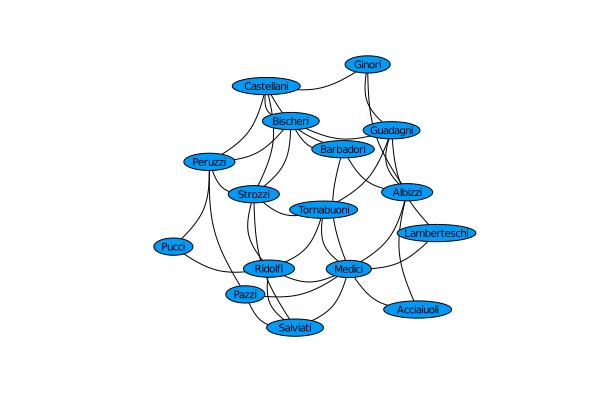

In [23]:
N = maximum(florentine)

g = path_graph(N)
for (i,j) in eachrow(florentine)
    add_edge!(g, i, j)
end

graphplot(g, names=florentine_names, nodesize=0.15, nodeshape=:ellipse)

In [24]:
vcat([florentine_names eigenvector_centrality(g)])

16×2 Array{Any,2}:
 "Acciaiuoli"    0.131483
 "Albizzi"       0.244821
 "Barbadori"     0.253257
 "Bischeri"      0.29259
 "Castellani"    0.280112
 "Ginori"        0.160975
 "Guadagni"      0.232134
 "Lamberteschi"  0.128785
 "Medici"        0.373544
 "Pazzi"         0.189277
 "Peruzzi"       0.261186
 "Pucci"         0.11702
 "Ridolfi"       0.28916
 "Salviati"      0.255442
 "Strozzi"       0.349361
 "Tornabuoni"    0.264554